# Incident Classification

There have been several bicycle crashes in Austin, and the city is receiving complaints that it is not doing enough to protect cyclists from motor vehicles. I will analyze the data on bicycle crashes collected by the city and advise if the accidents are in the control of the city and can be predicted using a model. This will protect cyclists and encourage green transport.

### Data Cleansing & Exploration

In [285]:
import numpy as np
import pandas as pd
from numpy import int64
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression

In [2]:
df = pd.read_csv('bike_crash.csv')
df.head()

,$1000 Damage to Any One Person's Property,Active School Zone Flag,At Intersection Flag,Average Daily Traffic Amount,Construction Zone Flag,Crash Severity,Crash Time,Crash Total Injury Count,Crash Year,Day of Week,Highway System,Intersection Related,Light Condition,Road Class,Roadway Part,Speed Limit,Surface Condition,Traffic Control Type,Weather Condition,Person Helmet
0,No,No,False,15262,No,Incapacitating Injury,239,1,2010,Friday,Farm To Market,Non Intersection,"Dark, Lighted",Farm To Market,Main/Proper Lane,45,Dry,Marked Lanes,Clear,"Worn, Damaged"
1,No,No,False,No Data,No,Non-Incapacitating Injury,310,2,2010,Friday,No Data,Non Intersection,"Dark, Lighted",City Street,Main/Proper Lane,35,Dry,Center Stripe/Divider,Clear,Not Worn
2,No,No,False,No Data,No,Non-Incapacitating Injury,310,2,2010,Friday,No Data,Non Intersection,"Dark, Lighted",City Street,Main/Proper Lane,35,Dry,Center Stripe/Divider,Clear,Not Worn
3,No,No,False,No Data,No,Non-Incapacitating Injury,310,2,2010,Friday,No Data,Non Intersection,"Dark, Lighted",City Street,Main/Proper Lane,35,Dry,Center Stripe/Divider,Clear,Not Worn
4,No,No,False,22775,No,Non-Incapacitating Injury,2300,1,2010,Monday,State Loop,Intersection Related,"Dark, Not Lighted",US & State Highways,Main/Proper Lane,45,Dry,None,Clear,Not Worn


In [3]:
df.shape[0]

2463

In [4]:
df.drop_duplicates(inplace=True)

In [5]:
df.shape[0]

2379

In [6]:
df.columns = df.columns.str.replace(' ','')

In [7]:
df.rename(columns={'$1000DamagetoAnyOnePerson\'sProperty':'Damage1K','ActiveSchoolZoneFlag':'SchoolZoneFlag','AtIntersectionFlag':'AtIntersectFlag','AverageDailyTrafficAmount':'AvgDailyTraffic','ConstructionZoneFlag':'ConstZoneFlag','CrashTotalInjuryCount':'CrashInjuryCount','IntersectionRelated':'IntersectRelated','TrafficControlType':'TrafficControl'},inplace=True)

In [8]:
df.dtypes

Damage1K            object
SchoolZoneFlag      object
AtIntersectFlag       bool
AvgDailyTraffic     object
ConstZoneFlag       object
CrashSeverity       object
CrashTime            int64
CrashInjuryCount     int64
CrashYear            int64
DayofWeek           object
HighwaySystem       object
IntersectRelated    object
LightCondition      object
RoadClass           object
RoadwayPart         object
SpeedLimit           int64
SurfaceCondition    object
TrafficControl      object
WeatherCondition    object
PersonHelmet        object
dtype: object

In [9]:
for col in df.iloc[:,[0,1,2,5,8,9,10,11,12,13,14,15,16,17,18,19]]:
    print(col,df[col].unique())

Damage1K ['No' 'Yes']
SchoolZoneFlag ['No' 'Yes']
AtIntersectFlag [False  True]
CrashSeverity ['Incapacitating Injury' 'Non-Incapacitating Injury' 'Possible Injury'
 'Not Injured' 'Killed']
CrashYear [2010 2011 2012 2013 2014 2015 2016 2017]
DayofWeek ['Friday' 'Monday' 'Wednesday' 'Thursday' 'Tuesday' 'Saturday' 'Sunday']
HighwaySystem ['Farm To Market' 'No Data' 'State Loop' 'Interstate' 'State Highway'
 'US Highway' 'Ranch To Mkt' 'State Spur']
IntersectRelated ['Non Intersection' 'Intersection Related' 'Driveway Access'
 'Intersection' 'Not Reported']
LightCondition ['Dark, Lighted' 'Dark, Not Lighted' 'Daylight' 'Dusk' 'Unknown'
 'Dark, Unknown Lighting' 'Dawn']
RoadClass ['Farm To Market' 'City Street' 'US & State Highways' 'Interstate'
 'Non Trafficway' 'County Road' 'Other Roads']
RoadwayPart ['Main/Proper Lane' 'Service/Frontage Road' 'Other (Explain In Narrative)'
 'Entrance/On Ramp']
SpeedLimit [45 35  0 30 40 50 55 60 25 15 65 20 10  5 36 -1 32]
SurfaceCondition ['Dry' 'Wet

In [10]:
df.replace(['No Data','Not Reported','Unknown','Unknown If Worn'],np.nan,inplace=True)
df.SpeedLimit.replace([-1,0],np.nan,inplace=True)

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2379 entries, 0 to 2462
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Damage1K          2379 non-null   object 
 1   SchoolZoneFlag    2379 non-null   object 
 2   AtIntersectFlag   2379 non-null   bool   
 3   AvgDailyTraffic   345 non-null    object 
 4   ConstZoneFlag     2379 non-null   object 
 5   CrashSeverity     2379 non-null   object 
 6   CrashTime         2379 non-null   int64  
 7   CrashInjuryCount  2379 non-null   int64  
 8   CrashYear         2379 non-null   int64  
 9   DayofWeek         2379 non-null   object 
 10  HighwaySystem     374 non-null    object 
 11  IntersectRelated  2378 non-null   object 
 12  LightCondition    2366 non-null   object 
 13  RoadClass         2379 non-null   object 
 14  RoadwayPart       2379 non-null   object 
 15  SpeedLimit        1763 non-null   float64
 16  SurfaceCondition  2368 non-null   object 


In [13]:
df['CrashTimeRange'] = pd.cut(df.CrashTime,bins=[0,200,400,600,800,1000,1200,1400,1600,1800,2000,2200,2400],labels=['0-2','2-4','4-6','6-8','8-10','10-12','12-14','14-16','16-18','18-20','20-22','22-24'])

In [14]:
df = df.drop(['AvgDailyTraffic','HighwaySystem','CrashTime'], axis=1)

plot 1. missing feature distributions


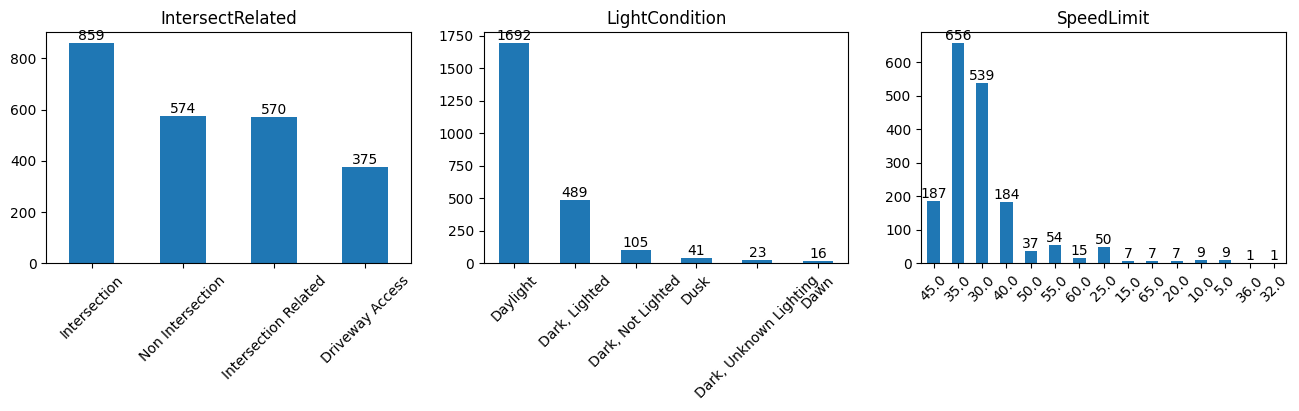

In [15]:
print('\033[1m' + 'plot 1. missing feature distributions' +'\033[0m')
plt.figure(figsize=(16,3))
plt.subplot(1,3,1); ax = df.IntersectRelated.value_counts().plot.bar(title='IntersectRelated')
ax.bar_label(ax.containers[0]); plt.xticks(rotation=45);
plt.subplot(1,3,2); ax = df.LightCondition.value_counts().plot.bar(title='LightCondition')
ax.bar_label(ax.containers[0]); plt.xticks(rotation=45);
plt.subplot(1,3,3); ax = df.SpeedLimit.value_counts(sort=False).plot.bar(title='SpeedLimit')
ax.bar_label(ax.containers[0]); plt.xticks(rotation=45);

plot 2. missing feature distributions


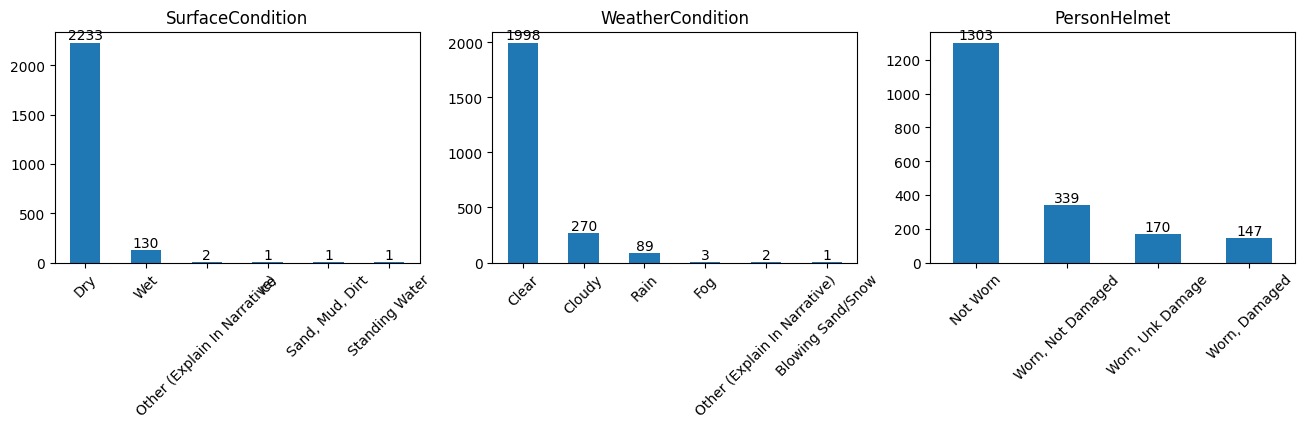

In [16]:
print('\033[1m' + 'plot 2. missing feature distributions' +'\033[0m')
plt.figure(figsize=(16,3))
plt.subplot(1,3,1); ax = df.SurfaceCondition.value_counts().plot.bar(title='SurfaceCondition')
ax.bar_label(ax.containers[0]); plt.xticks(rotation=45);
plt.subplot(1,3,2); ax = df.WeatherCondition.value_counts().plot.bar(title='WeatherCondition')
ax.bar_label(ax.containers[0]); plt.xticks(rotation=45);
plt.subplot(1,3,3); ax = df.PersonHelmet.value_counts().plot.bar(title='PersonHelmet')
ax.bar_label(ax.containers[0]); plt.xticks(rotation=45);

In [17]:
print(df.SpeedLimit.mode())
print(df.SpeedLimit.median())
print(df.SpeedLimit.mean())

0    35.0
Name: SpeedLimit, dtype: float64
35.0
35.60862166761203


In [18]:
# Filling NA values with mode
df.IntersectRelated.fillna('Intersection',inplace=True)
df.LightCondition.fillna('Daylight',inplace=True)
df.SpeedLimit.fillna(35,inplace=True)
df.SurfaceCondition.fillna('Dry',inplace=True)
df.WeatherCondition.fillna('Clear',inplace=True)
df.PersonHelmet.fillna('Not Worn',inplace=True)

## EDA

In [11]:
pd.crosstab(df.SpeedLimit,df.RoadClass,margins=True)

RoadClass,City Street,County Road,Farm To Market,Interstate,Non Trafficway,Other Roads,US & State Highways,All
SpeedLimit,,,,,,,,
5.0,2,0,0,1,6,0,0,9
10.0,1,0,0,1,7,0,0,9
15.0,4,0,0,1,2,0,0,7
20.0,6,0,0,0,1,0,0,7
25.0,48,0,0,1,1,0,0,50
30.0,489,5,3,10,9,1,22,539
32.0,0,0,0,0,0,0,1,1
35.0,547,1,11,10,20,0,67,656
36.0,1,0,0,0,0,0,0,1


plot 3. categorical distributions


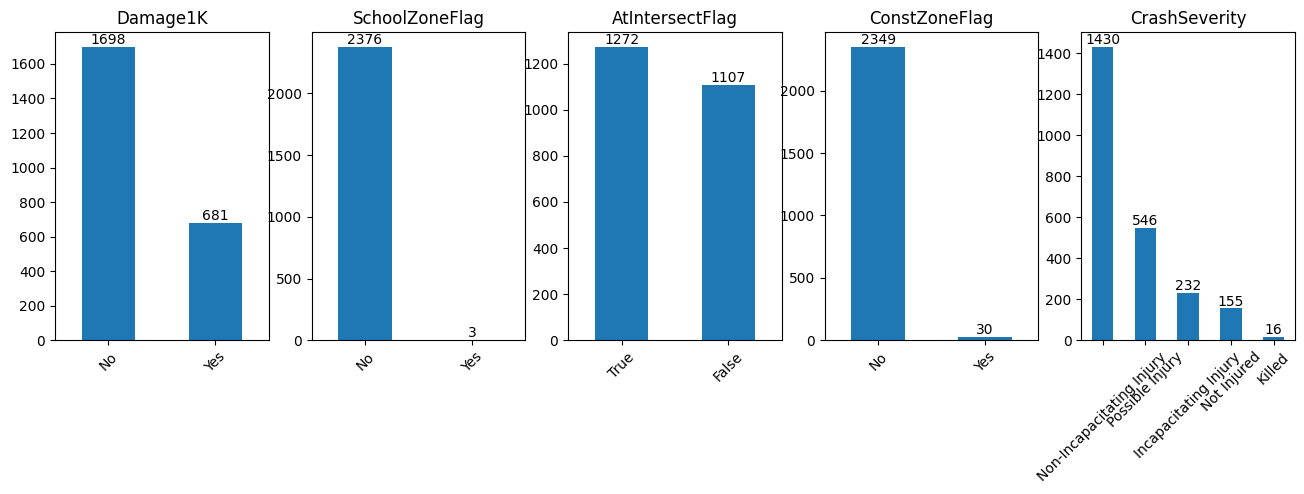

In [19]:
print('\033[1m' + 'plot 3. categorical distributions' +'\033[0m')
plt.figure(figsize=(16,4))
plt.subplot(1,5,1); ax = df.Damage1K.value_counts().plot.bar(title='Damage1K')
ax.bar_label(ax.containers[0]); plt.xticks(rotation=45);
plt.subplot(1,5,2); ax = df.SchoolZoneFlag.value_counts().plot.bar(title='SchoolZoneFlag')
ax.bar_label(ax.containers[0]); plt.xticks(rotation=45);
plt.subplot(1,5,3); ax = df.AtIntersectFlag.value_counts().plot.bar(title='AtIntersectFlag')
ax.bar_label(ax.containers[0]); plt.xticks(rotation=45);
plt.subplot(1,5,4); ax = df.ConstZoneFlag.value_counts().plot.bar(title='ConstZoneFlag')
ax.bar_label(ax.containers[0]); plt.xticks(rotation=45);
plt.subplot(1,5,5); ax = df.CrashSeverity.value_counts().plot.bar(title='CrashSeverity')
ax.bar_label(ax.containers[0]); plt.xticks(rotation=45);

plot 4. categorical distributions


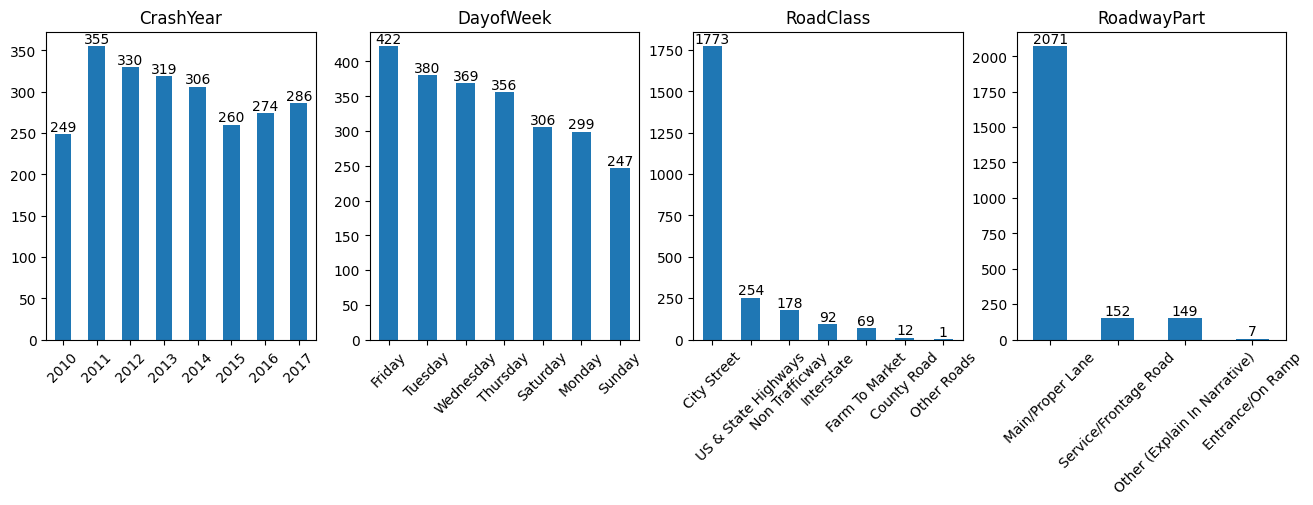

In [20]:
print('\033[1m' + 'plot 4. categorical distributions' +'\033[0m')
plt.figure(figsize=(16,4))
plt.subplot(1,4,1); ax = df.CrashYear.value_counts(sort=False).plot.bar(title='CrashYear')
ax.bar_label(ax.containers[0]); plt.xticks(rotation=45);
plt.subplot(1,4,2); ax = df.DayofWeek.value_counts().plot.bar(title='DayofWeek')
ax.bar_label(ax.containers[0]); plt.xticks(rotation=45);
plt.subplot(1,4,3); ax = df.RoadClass.value_counts().plot.bar(title='RoadClass')
ax.bar_label(ax.containers[0]); plt.xticks(rotation=45);
plt.subplot(1,4,4); ax = df.RoadwayPart.value_counts().plot.bar(title='RoadwayPart')
ax.bar_label(ax.containers[0]); plt.xticks(rotation=45);

plot 5. categorical distributions


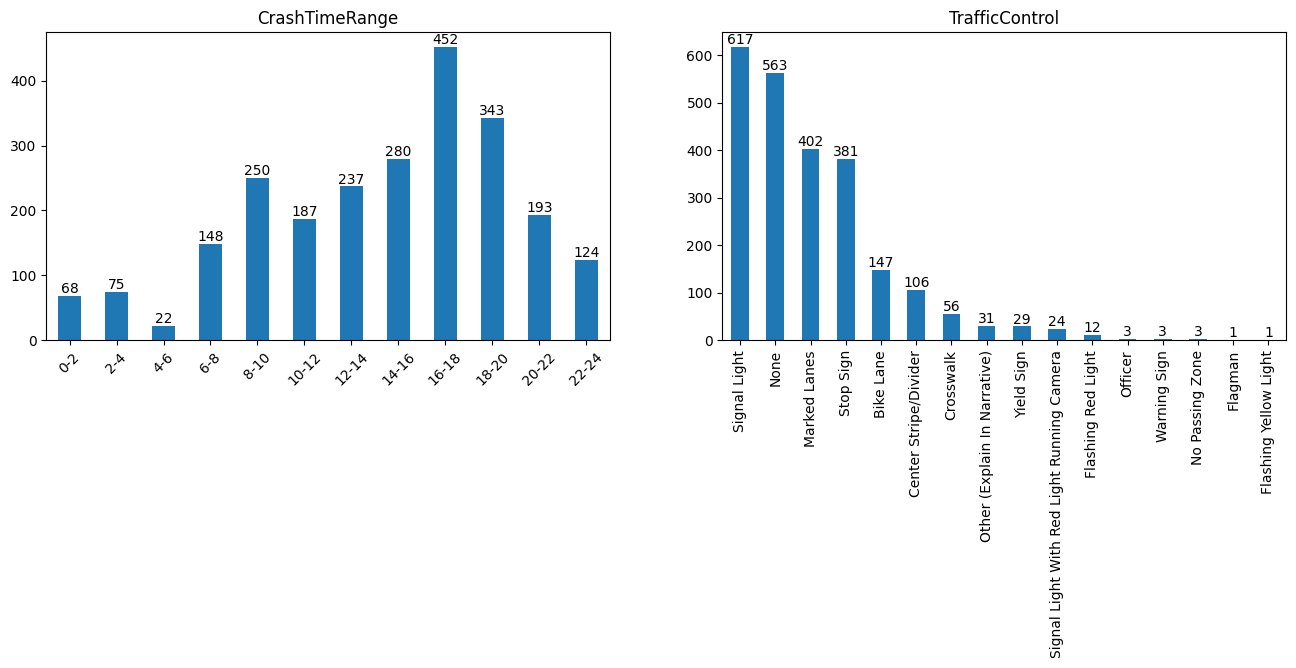

In [21]:
print('\033[1m' + 'plot 5. categorical distributions' +'\033[0m')
plt.figure(figsize=(16,4))
plt.subplot(1,2,1); ax = df.CrashTimeRange.value_counts(sort=False).plot.bar(title='CrashTimeRange')
ax.bar_label(ax.containers[0]); plt.xticks(rotation=45);
plt.subplot(1,2,2); ax = df.TrafficControl.value_counts().plot.bar(title='TrafficControl')
ax.bar_label(ax.containers[0]); plt.xticks(rotation=90);

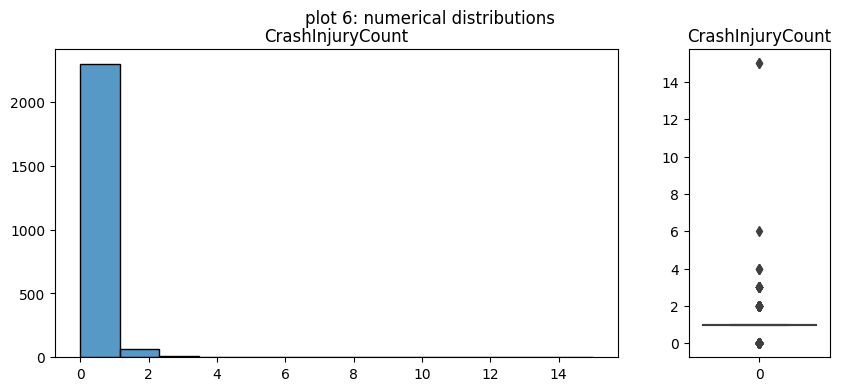

In [22]:
fig, axs = plt.subplots(1,2,figsize=(10,4),gridspec_kw={"width_ratios": (8,2)})
fig.suptitle('plot 6: numerical distributions')
sns.histplot(ax=axs[0],data=df.CrashInjuryCount).set(xlabel=None,ylabel=None,title='CrashInjuryCount')
sns.boxplot(ax=axs[1],data=df.CrashInjuryCount).set(xlabel=None,ylabel=None,title='CrashInjuryCount')
plt.show()

C:\Users\soura\AppData\Local\Temp\ipykernel_1820\2219442274.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(data=df.iloc[:,5:12].corr(),annot=True).set(title='plot 6: correlation matrix');


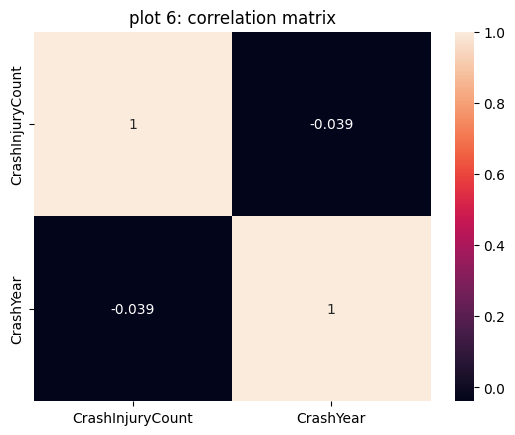

In [23]:
sns.heatmap(data=df.iloc[:,5:12].corr(),annot=True).set(title='plot 6: correlation matrix');

# Logistic Regression Model

In [24]:
df = df.drop(['Damage1K','CrashInjuryCount'], axis=1)

In [172]:
# Logistic Regression
df_tmp = df[['CrashSeverity','CrashYear','DayofWeek','IntersectRelated','LightCondition','RoadClass','TrafficControl']]
df_tmp['IsSevere']=df_tmp.CrashSeverity.replace(['Possible Injury','Incapacitating Injury','Killed'],1)
df_tmp.IsSevere=df_tmp.IsSevere.replace(['Non-Incapacitating Injury','Not Injured'],0)
df_tmp = df_tmp.drop(['CrashSeverity'],axis=1)
df_ec = pd.get_dummies(df_tmp,columns=['DayofWeek','IntersectRelated','LightCondition','RoadClass','TrafficControl'],drop_first=True)

y_logr=df_ec[['IsSevere']]
x_logr=df_ec.drop(['IsSevere'],axis=1)
x_train, x_test, z_train, z_test = train_test_split(x_logr, y_logr, test_size=0.20)

Xlog2 = sm.add_constant(x_train)
logr_model = sm.Logit(z_train, Xlog2) 
logr_fit = logr_model.fit()
print(logr_fit.summary())

         Current function value: 0.618842
         Iterations: 35
                           Logit Regression Results                           
Dep. Variable:               IsSevere   No. Observations:                 1903
Model:                          Logit   Df Residuals:                     1866
Method:                           MLE   Df Model:                           36
Date:                Sun, 12 Feb 2023   Pseudo R-squ.:                 0.02188
Time:                        23:51:23   Log-Likelihood:                -1177.7
converged:                      False   LL-Null:                       -1204.0
Covariance Type:            nonrobust   LLR p-value:                   0.03587
                                                                coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------------------------------
const                                             

C:\Users\soura\AppData\Local\Temp\ipykernel_1820\65861328.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tmp['IsSevere']=df_tmp.CrashSeverity.replace(['Possible Injury','Incapacitating Injury','Killed'],1)
C:\Users\soura\AppData\Local\Temp\ipykernel_1820\65861328.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_tmp.IsSevere=df_tmp.IsSevere.replace(['Non-Incapacitating Injury','Not Injured'],0)
C:\Users\soura\AppData\Local\Programs\Python\Python311\Lib\site-packages\statsmodels\base\model.py:60

In [236]:
df_tmp = df[['SchoolZoneFlag','AtIntersectFlag','ConstZoneFlag','CrashSeverity','CrashYear','DayofWeek','IntersectRelated','LightCondition','RoadClass','RoadwayPart','SpeedLimit','SurfaceCondition','TrafficControl','WeatherCondition','PersonHelmet','CrashTimeRange']]
df_ec = df.apply(LabelEncoder().fit_transform)

y_logr=df_ec[['CrashSeverity']]
x_logr=df_ec.drop(['CrashSeverity'],axis=1)
x_train, x_test, z_train, z_test = train_test_split(x_logr, y_logr, test_size=0.20)

In [294]:
logreg = LogisticRegression(max_iter=100)
logreg.fit(x_train,z_train.values.ravel())
z_pred=logreg.predict(x_test)
print(confusion_matrix(z_test, z_pred))
print(logreg.score(x_test, z_test))

[[328   0]
 [148   0]]
0.6890756302521008


# Random Forest Model

In [216]:
# Random Forest
rf_model = RandomForestClassifier(random_state=123,n_estimators=5000,max_depth=40)   
rf_model.fit(x_train,z_train.values.ravel())
z_pred = rf_model.predict(x_test)
print(confusion_matrix(z_test, z_pred))
print(classification_report(z_test, z_pred))

[[  2   0  37   0   1]
 [  0   0   2   0   0]
 [  2   0 273   1  18]
 [  0   0  33   1   2]
 [  0   0  95   0   9]]
              precision    recall  f1-score   support

           0       0.50      0.05      0.09        40
           1       0.00      0.00      0.00         2
           2       0.62      0.93      0.74       294
           3       0.50      0.03      0.05        36
           4       0.30      0.09      0.13       104

    accuracy                           0.60       476
   macro avg       0.38      0.22      0.20       476
weighted avg       0.53      0.60      0.50       476



C:\Users\soura\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\soura\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\soura\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

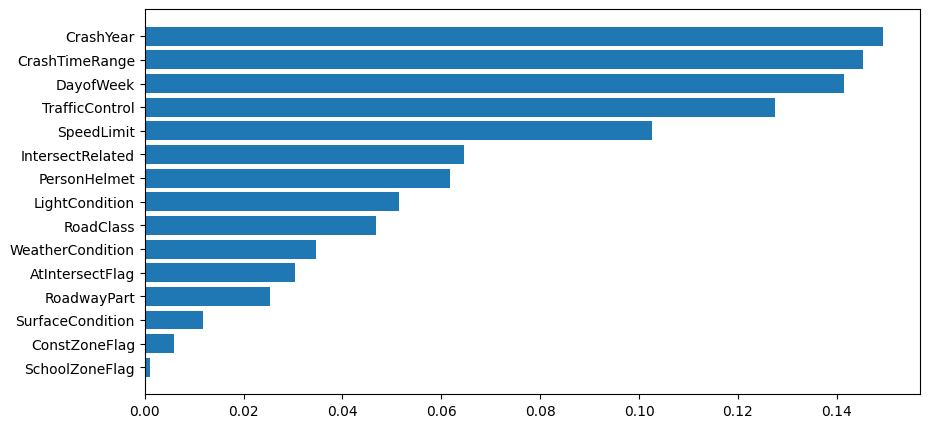

In [215]:
#Feature Importance
importances = rf_model.feature_importances_
indices = np.argsort(importances)
fig, ax = plt.subplots(figsize=(10,5))
ax.barh(range(len(importances)), importances[indices])
ax.set_yticks(range(len(importances)))
_ = ax.set_yticklabels(np.array(x_train.columns)[indices])

## Neural Network Model

In [237]:
# Normalization
unscaled_features = x_train
sc = StandardScaler()
x_train_array = sc.fit_transform(x_train.values)
x_train = pd.DataFrame(x_train_array,index=x_train.index,columns=x_train.columns)
x_test_array = sc.transform(x_test.values)
x_test = pd.DataFrame(x_test_array,index=x_test.index,columns=x_test.columns)

In [272]:
mlp = MLPClassifier(random_state=123,activation='logistic',solver='adam',learning_rate_init=0.02,max_iter=1000)
mlp.fit(x_train,z_train.values.ravel())
z_pred = mlp.predict(x_test)
print(confusion_matrix(z_test, z_pred))
print(classification_report(z_test, z_pred))

[[  7   0  16   3   8]
 [  0   0   2   0   1]
 [ 24   2 177  10  91]
 [  3   0  26   3   5]
 [  4   0  61   6  27]]
              precision    recall  f1-score   support

           0       0.18      0.21      0.19        34
           1       0.00      0.00      0.00         3
           2       0.63      0.58      0.60       304
           3       0.14      0.08      0.10        37
           4       0.20      0.28      0.23        98

    accuracy                           0.45       476
   macro avg       0.23      0.23      0.23       476
weighted avg       0.47      0.45      0.46       476



## Benchmarking the Models

We choose three metrics for model comparison: Recall (as detecting a higher number of several cases is critical), overall accuracy and time to run the model. Logistic Regression is accurate but useless as it predicts all cases as non-severe crashes. Among the remaining two, Random Forest has higher accuracy; however, Neural Network has higher Recall for several cases. I recommend that the city use the Neural Network model to simulate and correctly predict most of several crashes and focus on improving those spots. Also, all models take less than 25 seconds, which may not be significant as these models may not be put into production.

# Conclusion

Ensuring cyclists’ safety is the paramount responsibility of the city for decreasing emissions and creating a healthy lifestyle. The Austin bicycle crash dataset from 2010 to 2017 was cleaned and thoroughly analyzed for patterns to predict bicycle crashes and their Severity.

Both the Logistic Regression and Random Forest Models indicated that the primary factor impacting Severity is Crash Year, i.e., crash Severity has increased over the years. This could be indirectly due to other temporal factors not recorded in the dataset and will require additional research. Day of the Week also impacts Severity, roughly weekdays being more deadly than weekends, which could be because more cars head out on weekdays and are in an office rush. Other factors are the Time of the Crash (e.g., night times) and traffic control type (e.g., lack of bike lane or stop sign) that increase crash Severity. Among these, only the last factor is in City’s Control; hence it cannot be concluded that the city is not doing enough to protect cyclists, and additional temporal research is required regarding what has changed over the years. Also, the Neural Network model is recommended as it has a higher severe recall rate to identify more severe accidents. Using simulations, the city can use this to predict future bicycle accidents and possibly prevent them by taking precautionary measures at those spots.